## Solving a second order differential eqaution symbolically with python 

In [257]:
# setup 
from sympy import Eq, pi
import sympy as sp
import matplotlib.pyplot as plt
from numpy import linspace
sp.init_printing(use_latex='mathjax')
get_ipython().magic('matplotlib inline') # inline plotting

In [258]:
t,k,m,c = sp.symbols('t,k,m,c')
x = sp.Function('x') # (t)

In [259]:
k_ = 1e3  # spring constant, kN/m
m_ = 50 # mass, Kg
c_ = 3  # damping coefficient 

In [260]:
ode = k*x(t) + m*c*x(t).diff(t,1) + m*x(t).diff(t,2)
Eq(ode)

                            2          
    d                      d           
c⋅m⋅──(x(t)) + k⋅x(t) + m⋅───(x(t)) = 0
    dt                      2          
                          dt           

In [261]:
ode_sol = sp.dsolve(ode)
ode_sol

             ⎛        ________________⎞         ⎛        ________________⎞
             ⎜       ╱   ⎛ 2        ⎞ ⎟         ⎜       ╱   ⎛ 2        ⎞ ⎟
             ⎜     ╲╱  m⋅⎝c ⋅m - 4⋅k⎠ ⎟         ⎜     ╲╱  m⋅⎝c ⋅m - 4⋅k⎠ ⎟
           t⋅⎜-c - ───────────────────⎟       t⋅⎜-c + ───────────────────⎟
             ⎝              m         ⎠         ⎝              m         ⎠
           ────────────────────────────       ────────────────────────────
                        2                                  2              
x(t) = C₁⋅ℯ                             + C₂⋅ℯ                            

In [262]:
x0 = 0
v0 = 1.0

bc1 = Eq(ode_sol.lhs.subs(x(t),x0), ode_sol.rhs.subs(t,0))
bc2 = Eq(ode_sol.lhs.subs(x(t),v0), ode_sol.rhs.diff(t).subs(t,0))

C_eq = {bc1,bc2}
C_eq

   ⎛⎡                      ⎛         ________________⎞      ⎛         ________
   ⎜⎢                      ⎜        ╱   ⎛ 2        ⎞ ⎟      ⎜        ╱   ⎛ 2  
   ⎜⎢                      ⎜  c   ╲╱  m⋅⎝c ⋅m - 4⋅k⎠ ⎟      ⎜  c   ╲╱  m⋅⎝c ⋅m
set⎜⎢0 = C₁ + C₂, 1.0 = C₁⋅⎜- ─ - ───────────────────⎟ + C₂⋅⎜- ─ + ───────────
   ⎝⎣                      ⎝  2           2⋅m        ⎠      ⎝  2           2⋅m

________⎞⎤⎞
      ⎞ ⎟⎥⎟
 - 4⋅k⎠ ⎟⎥⎟
────────⎟⎥⎟
        ⎠⎦⎠

In [263]:
known_params = {m,c,k,t}
const = ode_sol.free_symbols - known_params
const

set([C₁, C₂])

In [264]:
Csol = sp.solve(C_eq,const)
Csol

⎧             -m                          m          ⎫
⎪C₁: ─────────────────────, C₂: ─────────────────────⎪
⎨       __________________         __________________⎬
⎪      ╱   ⎛ 2          ⎞         ╱   ⎛ 2          ⎞ ⎪
⎩    ╲╱  m⋅⎝c ⋅m - 4.0⋅k⎠       ╲╱  m⋅⎝c ⋅m - 4.0⋅k⎠ ⎭

In [265]:
ode_sol = ode_sol.subs(Csol)
ode_sol

              ⎛        ________________⎞        ⎛        ________________⎞
              ⎜       ╱   ⎛ 2        ⎞ ⎟        ⎜       ╱   ⎛ 2        ⎞ ⎟
              ⎜     ╲╱  m⋅⎝c ⋅m - 4⋅k⎠ ⎟        ⎜     ╲╱  m⋅⎝c ⋅m - 4⋅k⎠ ⎟
            t⋅⎜-c - ───────────────────⎟      t⋅⎜-c + ───────────────────⎟
              ⎝              m         ⎠        ⎝              m         ⎠
            ────────────────────────────      ────────────────────────────
                         2                                 2              
         m⋅ℯ                               m⋅ℯ                            
x(t) = - ─────────────────────────────── + ───────────────────────────────
                 __________________                __________________     
                ╱   ⎛ 2          ⎞                ╱   ⎛ 2          ⎞      
              ╲╱  m⋅⎝c ⋅m - 4.0⋅k⎠              ╲╱  m⋅⎝c ⋅m - 4.0⋅k⎠      

In [266]:
ode_sol = ode_sol.subs({m:m_, c:c_, k:k_})
ode_sol

                            t⋅(-3 - 8.42614977317636⋅ⅈ)                       
                            ───────────────────────────                       
                                         2                                    
x(t) = 0.118678165819385⋅ⅈ⋅ℯ                            - 0.118678165819385⋅ⅈ⋅

 t⋅(-3 + 8.42614977317636⋅ⅈ)
 ───────────────────────────
              2             
ℯ                           

C:\Users\neal\Anaconda3\lib\site-packages\numpy\core\numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


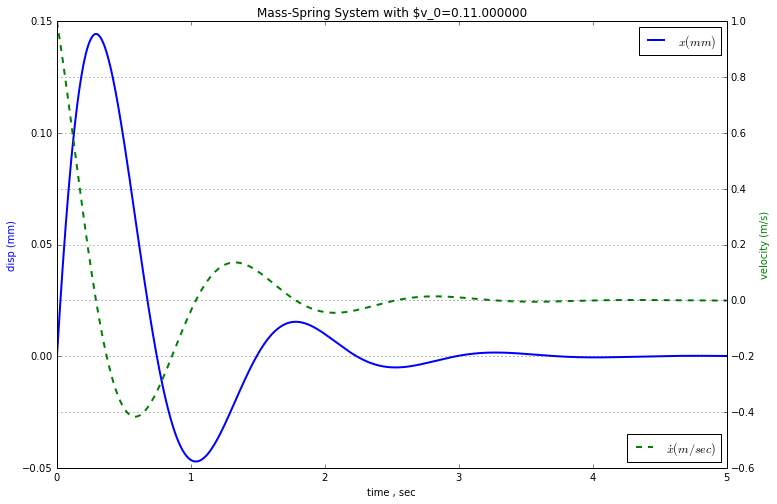

In [267]:
#sp.plot(ode_sol.rhs, (t,0,5)) ;

xfun = sp.lambdify(t,ode_sol.rhs, "numpy")
vfun = sp.lambdify(t,sp.diff(ode_sol.rhs), "numpy")

t = linspace(0,5,1000)

fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx()
ax1.plot(t,xfun(t),'b',label = r'$x (mm)$', linewidth=2.0)
ax2.plot(t,vfun(t),'g--',label = r'$\dot{x} (m/sec)$', linewidth=2.0)
ax2.legend(loc='lower right')
ax1.legend()
ax1.set_xlabel('time , sec')
ax1.set_ylabel('disp (mm)',color='b')
ax2.set_ylabel('velocity (m/s)',color='g')
plt.title('Mass-Spring System with $v_0=0.1%f' % (v0))
plt.grid()
plt.show()

## Solving a second order differential equation numerically

In [268]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot,xlabel,ylabel,title,legend,figure,subplots
from numpy import cos, pi, arange, sqrt, pi, array
get_ipython().magic('matplotlib inline') # inline plotting

In [269]:
def MassSpringDamper(state,t):
    '''
    k=spring constant, Newtons per metre
    m=mass, Kilograms
    c=dampign coefficient, Newton*second / meter    

    for a mass, spring, damper 
        xdd = -k*x/m -c*xd
    '''
  
    k=1e3  # spring constant, kN/m
    m=50 # mass, Kg
    c=3  # damping coefficient 
    # unpack the state vector
    x,xd = state # displacement,x and velocity x'
    # compute acceleration xdd = x''
    xdd = -k*x/m -c*xd
    return [xd, xdd]


In [270]:
x0=0
v0=1.0
state0 = [x0, v0]  #initial conditions [x0 , v0]  [m, m/sec] 
ti = 0.0  # initial time
tf = 5.0  # final time
step = 0.001  # step
t = arange(ti, tf, step)
state = odeint(MassSpringDamper, state0, t)
x = array(state[:,[0]])
xd = array(state[:,[1]])

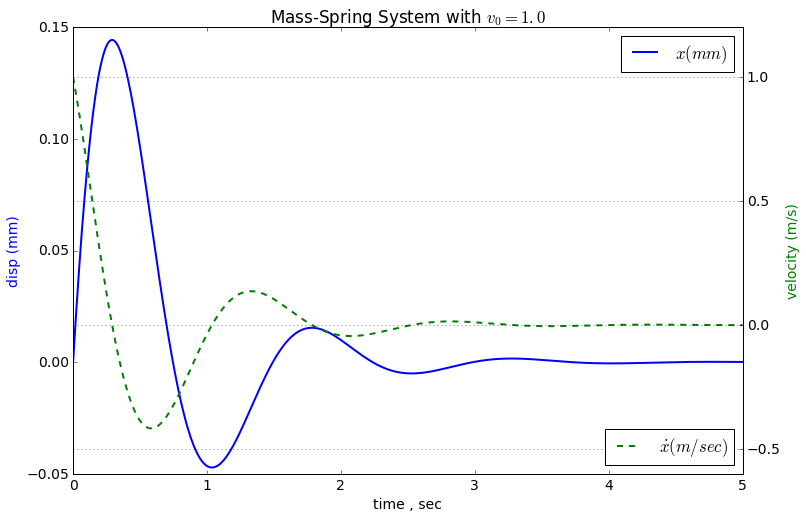

In [271]:
# Plotting displacement and velocity
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t,x,'b',label = r'$x (mm)$', linewidth=2.0)
ax2.plot(t,xd,'g--',label = r'$\dot{x} (m/sec)$', linewidth=2.0)
ax2.legend(loc='lower right')
ax1.legend()
ax1.set_xlabel('time , sec')
ax1.set_ylabel('disp (mm)',color='b')
ax2.set_ylabel('velocity (m/s)',color='g')
plt.title('Mass-Spring System with $v_0=%0.1f$' % (v0))
plt.grid()
plt.show()